In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
folder_path = "D:\\CODE\\Projects\\Rain in Australia"
os.chdir(folder_path)

In [2]:
data = pd.read_csv('weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#  ***Handle Dataframe***

In [3]:
# drop collateral columns
data = data.drop(columns=['Evaporation', 'Sunshine'])
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
# drop rows with NA in columns = ['RainToday','RainTomorrow']
print("Before cleaning: ", len(data[data['RainToday'].isna()]))
data = data.dropna(subset = ['RainToday','RainTomorrow'])
print("After cleaning: ", len(data[data['RainToday'].isna()]))

Before cleaning:  3261
After cleaning:  0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   WindGustDir    131624 non-null  object 
 6   WindGustSpeed  131682 non-null  float64
 7   WindDir9am     131127 non-null  object 
 8   WindDir3pm     137117 non-null  object 
 9   WindSpeed9am   139732 non-null  float64
 10  WindSpeed3pm   138256 non-null  float64
 11  Humidity9am    139270 non-null  float64
 12  Humidity3pm    137286 non-null  float64
 13  Pressure9am    127044 non-null  float64
 14  Pressure3pm    127018 non-null  float64
 15  Cloud9am       88162 non-null   float64
 16  Cloud3pm       84693 non-null   float64
 17  Temp9am        140131 non-nul

In [7]:
data.shape

(140787, 21)

In [8]:
data.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,140319.000000,140480.00000,140787.000000,131682.000000,139732.000000,138256.000000,139270.000000,137286.000000,127044.000000,127018.000000,88162.000000,84693.000000,140131.000000,138163.000000
mean,12.184824,23.23512,2.349974,39.970520,13.990496,18.631141,68.826833,51.449288,1017.654577,1015.257963,4.431161,4.499250,16.987066,21.693183
std,6.403879,7.11450,8.465173,13.578201,8.886210,8.798096,19.063650,20.807310,7.104867,7.035411,2.886594,2.719752,6.496012,6.937784
min,-8.500000,-4.80000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.90000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.60000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.30000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.10000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [9]:
data.mean()

MinTemp            12.184824
MaxTemp            23.235120
Rainfall            2.349974
WindGustSpeed      39.970520
WindSpeed9am       13.990496
WindSpeed3pm       18.631141
Humidity9am        68.826833
Humidity3pm        51.449288
Pressure9am      1017.654577
Pressure3pm      1015.257963
Cloud9am            4.431161
Cloud3pm            4.499250
Temp9am            16.987066
Temp3pm            21.693183
dtype: float64

In [10]:
# fill NaN values with columns' mean value in corresponding columns
# for example as you see above mean of 'MinTemp' is 12.184824. So we could fill the NaN cells of MinTemp column with its mean value ( and ONLY these ).
data = data.fillna(data.mean())

# check if we replaced every NaN value
data.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir      9163
WindGustSpeed       0
WindDir9am       9660
WindDir3pm       3670
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
dtype: int64

In [11]:
# handling not NaN values with replace.
data = data.replace(np.nan, 0.0)

In [12]:
# check again what we got
data.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# Now we' ll check if we have any outlier values in our dataframe, for each feature.

In [13]:
# create a list with all features
features = list(data)

In [14]:
features

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [15]:
# split features to numerical and categorical
numerical = data.select_dtypes(include=['float64'])

categorical = data.select_dtypes(include=['object','bool'])

In [16]:
numerical

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,4.431161,4.49925,9.4,20.9
145455,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,4.431161,4.49925,10.1,22.4
145456,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,4.431161,4.49925,10.9,24.5
145457,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,4.431161,4.49925,12.5,26.1


In [17]:
categorical

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,E,ESE,E,No,No
145455,2017-06-21,Uluru,E,SE,ENE,No,No
145456,2017-06-22,Uluru,NNW,SE,N,No,No
145457,2017-06-23,Uluru,N,SE,WNW,No,No


Text(0.5, 1.0, 'Outliers')

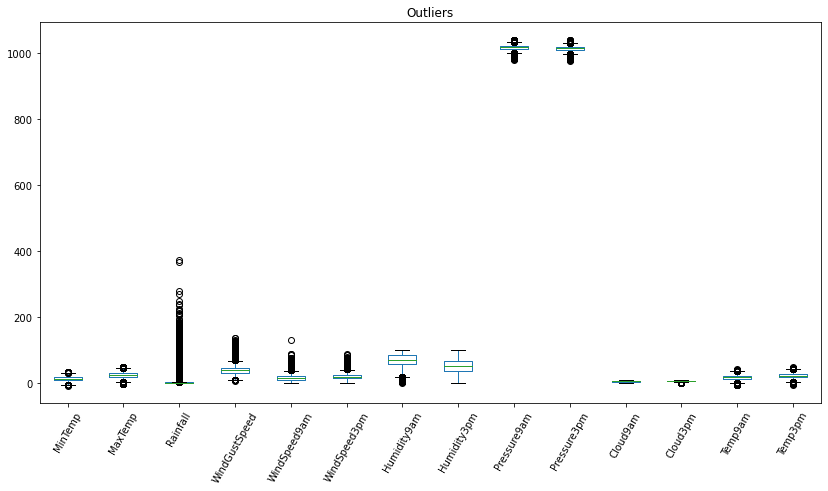

In [18]:
# data.boxplot(return_type='axes')
data.plot(kind='box',figsize=(14,7))
plt.xticks(rotation=60)
plt.title('Outliers')

# As you see we have a big amount of outlier dots in Rainfall column, and so to others. So we have to clear these rows too.

In [19]:
#  make Q1-Q3-IQR for deleting outliers
Q1 = [data[feature].quantile(0.25) for feature in numerical]
Q3 = [data[feature].quantile(0.75) for feature in numerical]
IQR = [q3-q1 for q1,q3 in zip(Q1,Q3)]

In [20]:
Q1

[7.6,
 17.9,
 0.0,
 31.0,
 7.0,
 13.0,
 57.0,
 37.0,
 1013.5,
 1011.0,
 3.0,
 4.0,
 12.3,
 16.7]

In [21]:
Q3

[16.8,
 28.2,
 0.8,
 46.0,
 19.0,
 24.0,
 83.0,
 65.0,
 1021.8,
 1019.4,
 6.0,
 6.0,
 21.5,
 26.3]

In [22]:
IQR

[9.200000000000001,
 10.3,
 0.8,
 15.0,
 12.0,
 11.0,
 26.0,
 28.0,
 8.299999999999955,
 8.399999999999977,
 3.0,
 2.0,
 9.2,
 9.600000000000001]

In [23]:
IQR = [iqr * 1.5 for iqr in IQR]
Q1 = [q1-iqr for q1,iqr in zip(Q1,IQR)]
Q3 = [q3+iqr for q3,iqr in zip(Q3,IQR)]

In [24]:
def removeOutliers(Q1,Q3,column,index):
    q1 = Q1[index]
    q3 = Q3[index]
    data[column] = np.where(data[column]<q1,q1,data[column])
    data[column] = np.where(data[column]>q3, q3,data[column])
    

In [25]:
index = 0
for column in numerical:
    removeOutliers(Q1,Q3,column,index)
    index += 1
    

Text(0.5, 1.0, 'Outliers')

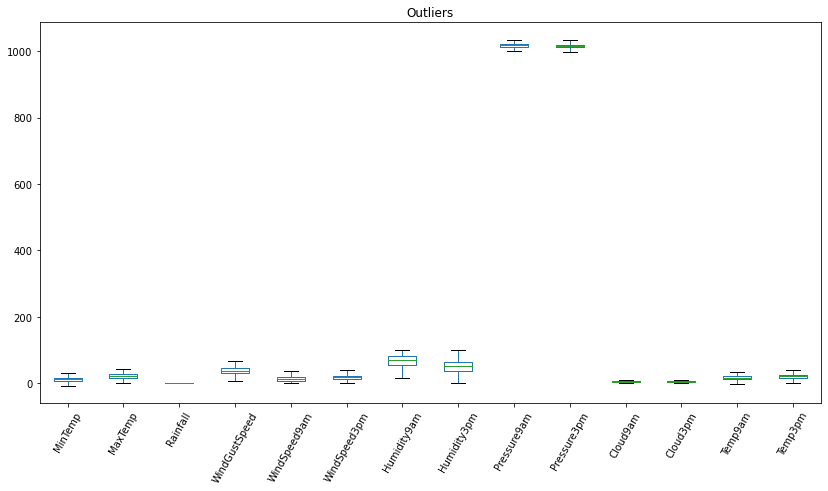

In [26]:
# data.boxplot(return_type='axes')
data.plot(kind='box',figsize=(14,7))
plt.xticks(rotation=60)
plt.title('Outliers')

### All in all, we clear every outlier as you observe above, and now we are ready to train our data.